## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)
 

## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
df.shape

(39717, 111)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data Cleaning

#### Overall we have 39717 rows if we have the same number of rows in missing in the columns we need to drop those columns

In [7]:
(df.isna().sum()).sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [8]:
missing = df.isna().sum()
missing_df = pd.DataFrame({'name': df.columns,'missing%': missing})
missing_df.sort_values('missing%', inplace=True)

In [9]:
missing_df = missing_df[(missing_df['missing%'] == 39717)].name.tolist()

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [10]:
missing_drop_df = df.drop(missing_df, axis=1)

In [11]:
missing_drop_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [12]:
missing_drop_df.nunique().sort_values(ascending=False)

id                            39717
member_id                     39717
url                           39717
total_pymnt                   37850
total_pymnt_inv               37518
total_rec_int                 35148
last_pymnt_amnt               34930
emp_title                     28820
desc                          26527
revol_bal                     21711
title                         19615
installment                   15383
funded_amnt_inv                8205
total_rec_prncp                7976
annual_inc                     5318
recoveries                     4040
dti                            2868
collection_recovery_fee        2616
total_rec_late_fee             1356
out_prncp_inv                  1138
out_prncp                      1137
revol_util                     1089
funded_amnt                    1041
loan_amnt                       885
zip_code                        823
earliest_cr_line                526
int_rate                        371
mths_since_last_record      

In [13]:
#We have 9 Columns with unique values, which will not drive any insights dropping will be efficient.
missing_drop_unique_df = missing_drop_df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
                                                           'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
                                                           'delinq_amnt', 'tax_liens'], axis=1)

In [14]:
#Based on the Data Dictionary and the data available we see the below columns are not adding any values in our Analysis
missing_drop_unique_uw_df = missing_drop_unique_df.drop(['desc', 'member_id', 'id', 'url', 'next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq','emp_title'], axis=1)

In [15]:
missing_drop_unique_uw_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


## Derived Columns

In [16]:
missing_drop_unique_uw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [17]:
missing_drop_unique_uw_df['months'] = missing_drop_unique_uw_df['term'].str.rstrip('months')
missing_drop_unique_uw_df.drop(['term'], axis = 1, inplace = True)

missing_drop_unique_uw_df['rate%'] = missing_drop_unique_uw_df['int_rate'].str.rstrip('%')
missing_drop_unique_uw_df.drop(['int_rate'], axis = 1, inplace = True)

missing_drop_unique_uw_df['emp_history'] = missing_drop_unique_uw_df['emp_length'].str.rstrip('years ')
missing_drop_unique_uw_df['emp_history'].replace({'10+': '10', '< 1': '0'}, inplace=True)
missing_drop_unique_uw_df.drop(['emp_length'], axis = 1, inplace = True)

missing_drop_unique_uw_df['iss_month'], missing_drop_unique_uw_df['iss_year'] = missing_drop_unique_uw_df['issue_d'].str.split('-').str
missing_drop_unique_uw_df.drop(['issue_d'], axis = 1, inplace = True)

missing_drop_unique_uw_df['iss_year'] = '20' + missing_drop_unique_uw_df['iss_year']


missing_drop_unique_uw_df['last_crd_month'], missing_drop_unique_uw_df['last_crd_year'] = missing_drop_unique_uw_df['last_credit_pull_d'].str.split('-').str
missing_drop_unique_uw_df.drop(['last_credit_pull_d'], axis = 1, inplace = True)

missing_drop_unique_uw_df['last_crd_year'] = '20' + missing_drop_unique_uw_df['last_crd_year']


missing_drop_unique_uw_df['last_pmt_month'], missing_drop_unique_uw_df['last_pmt_year'] = missing_drop_unique_uw_df['last_pymnt_d'].str.split('-').str
missing_drop_unique_uw_df.drop(['last_pymnt_d'], axis = 1, inplace = True)

missing_drop_unique_uw_df['last_pmt_year'] = '20' + missing_drop_unique_uw_df['last_pmt_year']

In [18]:
missing_drop_unique_uw_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,months,rate%,emp_history,iss_month,iss_year,last_crd_month,last_crd_year,last_pmt_month,last_pmt_year
0,5000,5000,4975.0,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,36,10.65,10,Dec,2011,May,2016,Jan,2015
1,2500,2500,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,60,15.27,0,Dec,2011,Sep,2013,Apr,2013
2,2400,2400,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,36,15.96,10,Dec,2011,May,2016,Jun,2014
3,10000,10000,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,36,13.49,10,Dec,2011,Apr,2016,Jan,2015
4,3000,3000,3000.0,67.79,B,B5,RENT,80000.0,Source Verified,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,60,12.69,1,Dec,2011,May,2016,May,2016


## Convert Datatypes

In [19]:
missing_drop_unique_uw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   installment              39717 non-null  float64
 4   grade                    39717 non-null  object 
 5   sub_grade                39717 non-null  object 
 6   home_ownership           39717 non-null  object 
 7   annual_inc               39717 non-null  float64
 8   verification_status      39717 non-null  object 
 9   loan_status              39717 non-null  object 
 10  purpose                  39717 non-null  object 
 11  title                    39706 non-null  object 
 12  zip_code                 39717 non-null  object 
 13  addr_state               39717 non-null  object 
 14  dti                   

In [20]:
columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_history', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'months',
          'rate%']
missing_drop_unique_uw_df[columns] = missing_drop_unique_uw_df[columns].astype(np.float)

In [21]:
missing_drop_unique_uw_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,months,rate%,emp_history,iss_month,iss_year,last_crd_month,last_crd_year,last_pmt_month,last_pmt_year
0,5000.0,5000.0,4975.0,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648.0,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,36.0,10.65,10.0,Dec,2011,May,2016,Jan,2015
1,2500.0,2500.0,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687.0,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,60.0,15.27,0.0,Dec,2011,Sep,2013,Apr,2013
2,2400.0,2400.0,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956.0,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,36.0,15.96,10.0,Dec,2011,May,2016,Jun,2014
3,10000.0,10000.0,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598.0,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,36.0,13.49,10.0,Dec,2011,Apr,2016,Jan,2015
4,3000.0,3000.0,3000.0,67.79,B,B5,RENT,80000.0,Source Verified,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783.0,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,60.0,12.69,1.0,Dec,2011,May,2016,May,2016


In [22]:
final_df = missing_drop_unique_uw_df.copy()

## Univariate Analysis

In [23]:
final_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,months,rate%,emp_history,iss_month,iss_year,last_crd_month,last_crd_year,last_pmt_month,last_pmt_year
0,5000.0,5000.0,4975.0,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648.0,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,36.0,10.65,10.0,Dec,2011,May,2016,Jan,2015
1,2500.0,2500.0,2500.0,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687.0,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,60.0,15.27,0.0,Dec,2011,Sep,2013,Apr,2013
2,2400.0,2400.0,2400.0,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956.0,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,36.0,15.96,10.0,Dec,2011,May,2016,Jun,2014
3,10000.0,10000.0,10000.0,339.31,C,C1,RENT,49200.0,Source Verified,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598.0,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,36.0,13.49,10.0,Dec,2011,Apr,2016,Jan,2015
4,3000.0,3000.0,3000.0,67.79,B,B5,RENT,80000.0,Source Verified,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783.0,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.0,60.0,12.69,1.0,Dec,2011,May,2016,May,2016


In [24]:
final_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'months', 'rate%', 'emp_history', 'iss_month', 'iss_year',
       'last_crd_month', 'last_crd_year', 'last_pmt_month', 'last_pmt_year'],
      dtype='object')

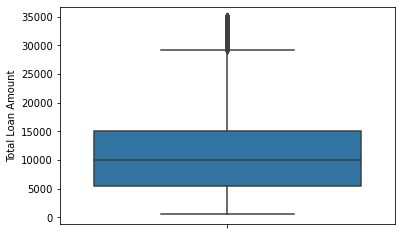

Insights: We have a mean of 10000 and having a range of all the way from 0 - 30000


In [25]:
sns.boxplot( y=final_df["loan_amnt"] )
plt.ylabel('Total Loan Amount')
plt.show()

print('Insights: We have a mean of 10000 and having a range of all the way from 0 - 30000')

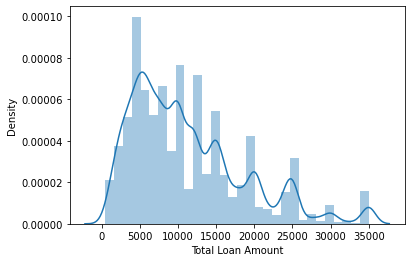

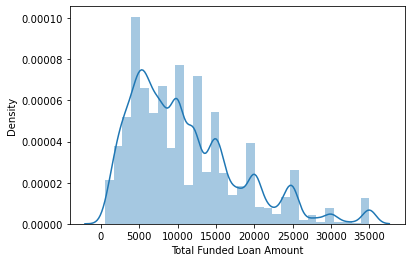

Insights: 


In [26]:
sns.distplot(final_df['loan_amnt'], bins=30)
plt.xlabel('Total Loan Amount')
plt.show()

sns.distplot(final_df['funded_amnt'], bins=30)
plt.xlabel('Total Funded Loan Amount')
plt.show()

print('Insights: ')

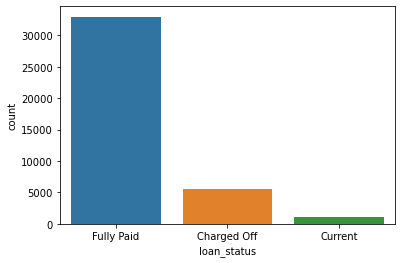

Insights: Default rate is almost 20% overall


In [27]:
sns.countplot(x= final_df["loan_status"])
plt.show()

print('Insights: Default rate is almost 20% overall')

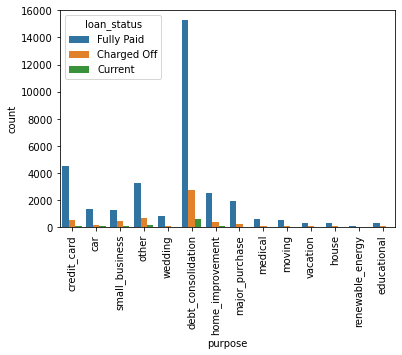

Insights: Debt Consilidation is more likely to get more loan and default rate is also high


In [28]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()
print('Insights: Debt Consilidation is more likely to get more loan and default rate is also high')

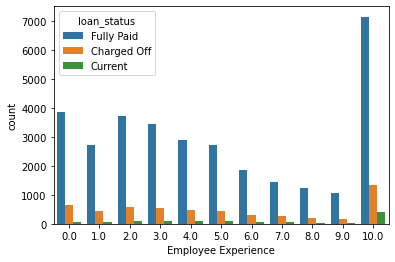

Insights: Extra screening for loan approval for 10+ years to be initiated as we see the default rate can increase.


In [29]:
sns.countplot(x='emp_history', hue='loan_status', data = final_df)
plt.xlabel('Employee Experience')
plt.show()

print('Insights: Extra screening for loan approval for 10+ years to be initiated as we see the default rate can increase.')

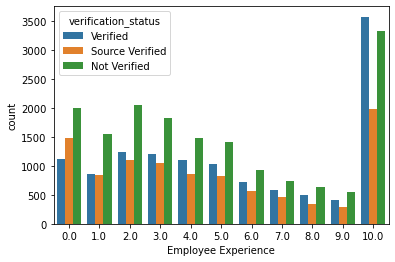

Insights: Extra screening for loan approval for 10+ years to be initiated as we see the default rate can increase.


In [30]:
sns.countplot(x='emp_history', hue='verification_status', data = final_df)
plt.xlabel('Employee Experience')
plt.show()
print('Insights: Extra screening for loan approval for 10+ years to be initiated as we see the default rate can increase.')

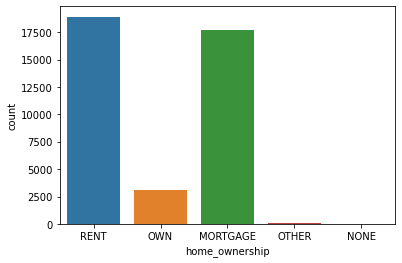

Insights: Mortgage and Rent ownership individuals are likely to take more loans and the risk to default is almost 10-15%.


In [31]:
sns.countplot(x= final_df["home_ownership"])
plt.show()

print('Insights: Mortgage and Rent ownership individuals are likely to take more loans and the risk to default is almost 10-15%.')

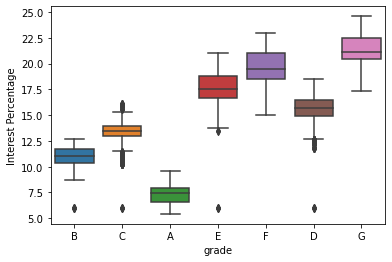

Insights: Low Grade loans are more likely to get defaulted (Interest rate to be increased)


In [32]:
sns.boxplot(y='rate%', x='grade', data=final_df)
plt.ylabel('Interest Percentage')
plt.show()

print('Insights: Low Grade loans are more likely to get defaulted (Interest rate to be increased)')

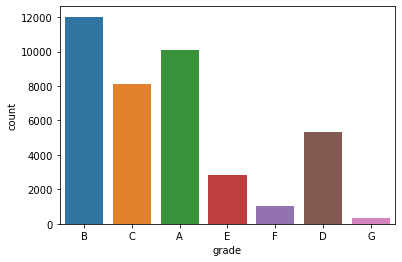

Insights: Low Grade loans are more likely to get defaulted (Interest rate to be increased)


In [33]:
sns.countplot(x='grade', data=final_df)
plt.show()
print('Insights: Low Grade loans are more likely to get defaulted (Interest rate to be increased)')

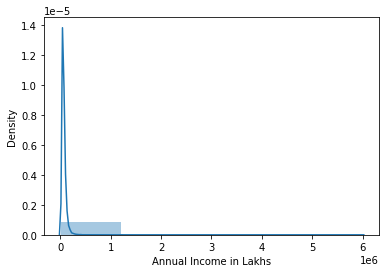

Insights: Employee salary mostly range below 100000


In [34]:
sns.distplot(final_df['annual_inc'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

print('Insights: Employee salary mostly range below 100000')

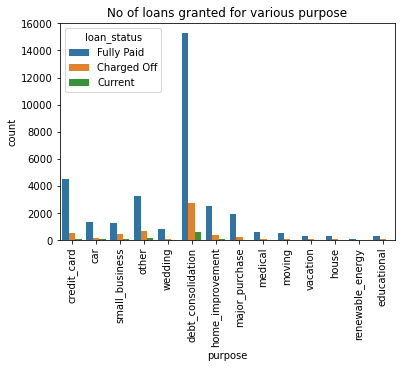

In [35]:
sns.countplot(x='purpose', hue='loan_status', data=final_df)
plt.title('No of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

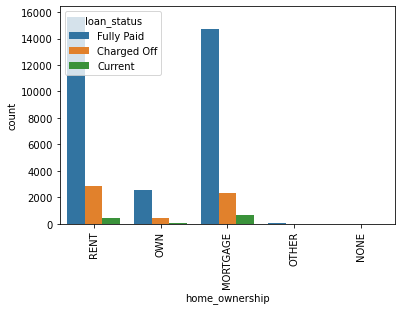

In [36]:
sns.countplot(x='home_ownership',hue='loan_status', data = final_df)
plt.xticks(rotation=90)
plt.show()

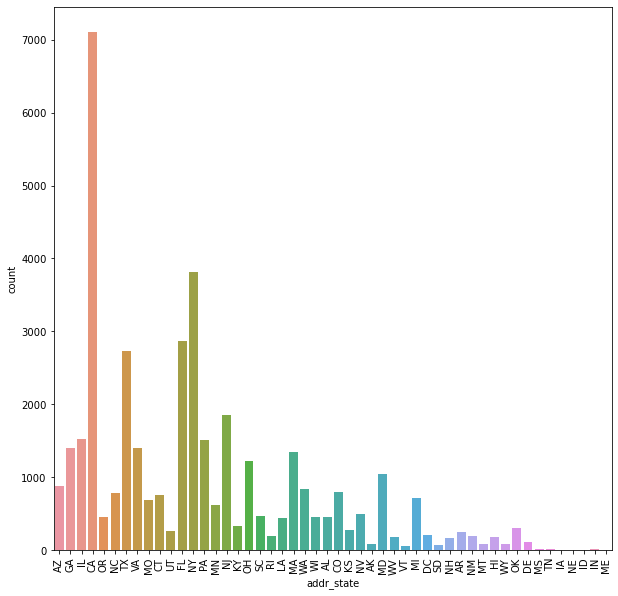

Insights: California people tend to take more loans


In [37]:
plt.figure(figsize=(10,10))
sns.countplot(x='addr_state',data = final_df)
plt.xticks(rotation=90)
plt.show()

print('Insights: California people tend to take more loans')

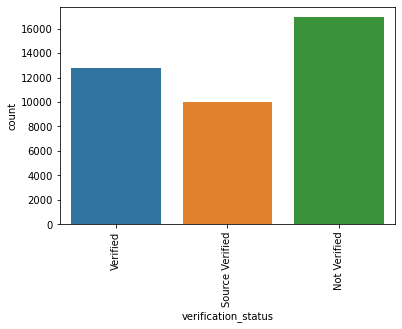

Insights: Proper verificaiton/screening to be made to reduce the defaults rate.


In [38]:
sns.countplot(x='verification_status',data = final_df)
plt.xticks(rotation=90)
plt.show()

print('Insights: Proper verificaiton/screening to be made to reduce the defaults rate.')

## Bivariate Analysis

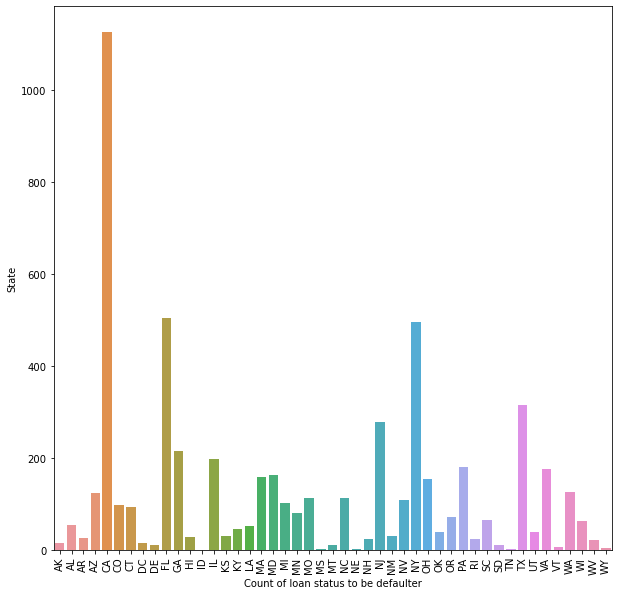

Insights: California people tend to take more loans, but we see there is almost ~15% Default rate.


In [39]:
temp = final_df[final_df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='loan_status', x='addr_state', data=temp)
plt.xlabel('Count of loan status to be defaulter')
plt.xticks(rotation=90)
plt.ylabel('State')
plt.show()

print('Insights: California people tend to take more loans, but we see there is almost ~15% Default rate.')

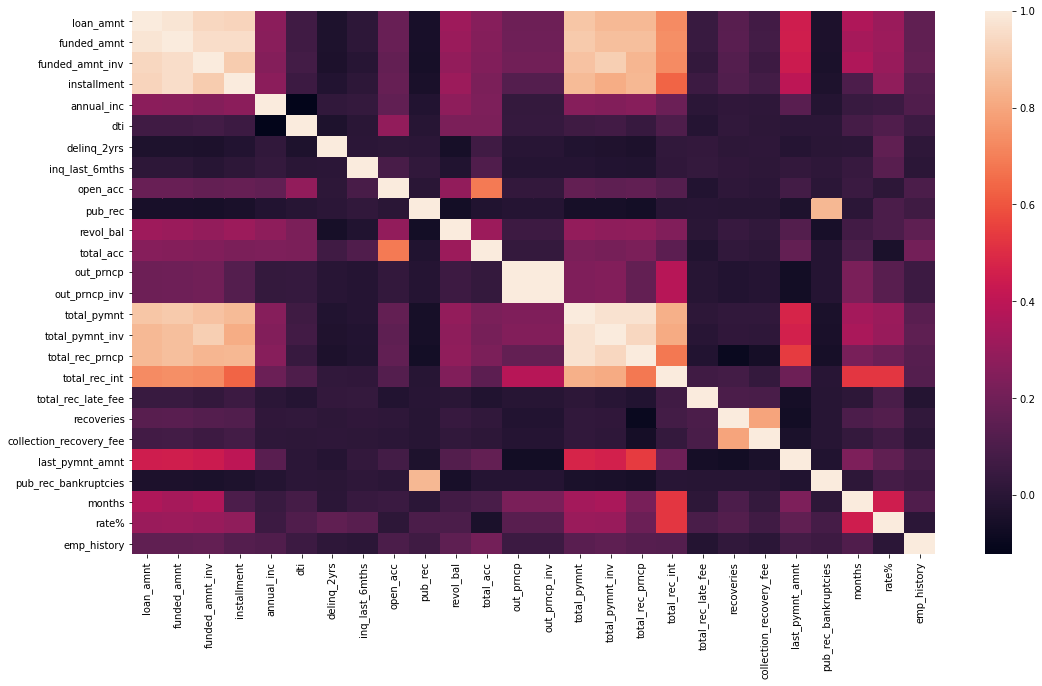

Insights: Most of the variables are co-related with each other. Especially the funding amount.


In [40]:
plt.figure(figsize=(18,10))
sns.heatmap(final_df.corr())
plt.show()
print('Insights: Most of the variables are co-related with each other. Especially the funding amount.')

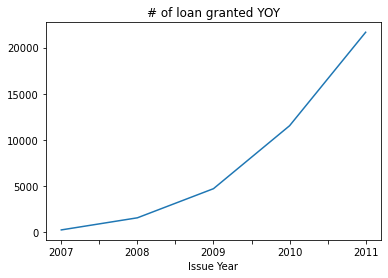

Insights: Loan offering is on positive trend as the company is moving in right direction.


In [41]:
temp = final_df.groupby('iss_year')['loan_status'].count()

temp.plot.line(x_compat=True)
plt.title('# of loan granted YOY')
plt.xlabel('Issue Year')
plt.show()

print('Insights: Loan offering is on positive trend as the company is moving in right direction.')

In [42]:
final_df.last_pmt_year.unique()

array(['2015', '2013', '2014', '2016', '2012', nan, '2011', '2010',
       '2009', '2008'], dtype=object)

Insights: Loan offering is on positive trend as the company is moving in right direction.


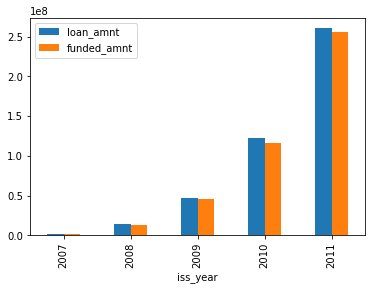

In [43]:
temp = final_df.groupby('iss_year').sum()
temp = temp[['loan_amnt','funded_amnt']]
temp.plot.bar()
print('Insights: Loan offering is on positive trend as the company is moving in right direction.')

In [44]:
final_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade',
       'sub_grade', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'months', 'rate%', 'emp_history', 'iss_month', 'iss_year',
       'last_crd_month', 'last_crd_year', 'last_pmt_month', 'last_pmt_year'],
      dtype='object')